In [1]:
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [2]:
def get_filtered_words(path, file):
    stopWords = set(stopwords.words("english"))
    stopWords.add("-")    # add these characters to the stop words as well as they're pretty much useless :/
    stopWords.add("|")    
    stopWords.add("Subject")    
    words_final = []
    with open(f"{path}/{file}", "r") as f:
        try:
            lines = f.read()
            # print(lines)
            words = word_tokenize(lines)
            words_final = []
            for word in words:
                if word not in stopWords:
                    words_final.append(word)
        except Exception as e:
            print(e)
    return words_final



In [26]:
path = "enron1/ham"
file_names = os.listdir(path)
print(len(file_names))
total_ham_messages = len(file_names)

3672


In [4]:
ham_words = {}
for file in file_names:  
    ham_temp = get_filtered_words(path, file)
    for word in ham_temp:
        if word not in ham_words:
            ham_words[word] = 1
        else:
            ham_words[word] = ham_words[word] + 1
    



In [5]:
print(ham_words)

{':': 24164, 'christmas': 19, 'tree': 4, 'farm': 6, 'pictures': 42, 'vastar': 11, 'resources': 250, ',': 29413, 'inc': 249, '.': 35192, 'gary': 561, 'production': 639, 'high': 176, 'island': 30, 'larger': 15, 'block': 16, '1': 2023, '#': 1913, '2': 1521, 'commenced': 10, 'saturday': 94, '00': 1819, 'p': 457, '6': 736, '500': 206, 'gross': 9, 'carlos': 190, 'expects': 16, '9': 664, '10': 1815, '000': 1880, 'tomorrow': 149, 'owns': 15, '68': 31, '%': 504, 'george': 406, 'x': 472, '3': 1683, '6992': 27, 'forwarded': 1296, 'weissman': 196, '/': 37141, 'hou': 7281, 'ect': 13897, '12': 1206, '13': 392, '99': 747, '16': 501, 'daren': 1901, 'j': 1300, 'farmer': 1137, '38': 104, 'rodriguez': 142, '@': 12168, 'cc': 2359, 'melissa': 462, 'graves': 265, 'subject': 2731, 'please': 2715, 'call': 619, 'linda': 65, 'get': 790, 'everything': 65, 'set': 387, "'": 5780, 'going': 213, 'estimate': 102, '4': 1083, 'coming': 103, 'increase': 129, 'following': 611, 'day': 874, 'based': 234, 'conversations': 3

In [27]:
path = "enron1/spam"
file_names = os.listdir(path)
print(len(file_names))
total_spam_messages = len(file_names)

1500


In [7]:
spam_words = {}
for file in file_names:  
    spam_temp = get_filtered_words(path, file)
    for word in spam_temp:
        if word not in spam_words:
            spam_words[word] = 1
        else:
            spam_words[word] = spam_words[word] + 1
    

'charmap' codec can't decode byte 0x9d in position 1651: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 42: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 42: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 87: character maps to <undefined>


In [8]:
print(spam_words)

{':': 6105, 'dobmeos': 1, 'hgh': 14, 'energy': 141, 'level': 35, 'gone': 22, '!': 2458, 'stukm': 1, 'introducing': 8, 'doctor': 59, 'formulated': 6, 'human': 13, 'growth': 82, 'hormone': 9, 'also': 210, 'called': 28, 'referred': 6, 'medical': 66, 'science': 14, 'master': 10, '.': 19456, 'plentiful': 1, 'young': 45, ',': 11201, 'near': 41, 'age': 46, 'twenty': 22, 'one': 392, 'bodies': 8, 'begin': 37, 'produce': 16, 'less': 101, 'time': 361, 'forty': 9, 'nearly': 18, 'everyone': 38, 'deficient': 1, 'eighty': 4, 'production': 64, 'normally': 41, 'diminished': 1, 'least': 19, '90': 175, '95': 179, '%': 1104, 'advantages': 11, 'increased': 41, 'muscle': 37, 'strength': 9, 'loss': 69, 'body': 79, 'fat': 45, 'bone': 9, 'density': 2, 'lower': 27, 'blood': 21, 'pressure': 8, 'quickens': 1, 'wound': 4, 'healing': 7, 'reduces': 4, 'cellulite': 3, 'improved': 24, 'vision': 8, 'wrinkle': 4, 'disappearance': 1, 'skin': 19, 'thickness': 1, 'texture': 1, 'levels': 13, 'sleep': 27, 'emotional': 19, 's

In [9]:
(10 + 5 + 2.5) * 2 + 20

55.0

In [10]:
print(f"Words in ham dictionary: {len(ham_words)}")   # these 2 are dictionaries
print(f"WOrds in spam dictionary: {len(spam_words)}")
ham_set = set(ham_words)
spam_set = set(spam_words)
print(f"Length of ham set: {len(ham_set)}")     # These are the number of unique words
print(f"Length of spam set: {len(spam_set)}")


Words in ham dictionary: 20098
WOrds in spam dictionary: 38611
Length of ham set: 20098
Length of spam set: 38611


In [11]:
words = ham_words.keys()
string = ""      # make a string of all the dicitonary keys to make a word cloud..
for word  in words:
    string += word
    string += " "

In [12]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(string)

(-0.5, 2999.5, 1999.5, -0.5)

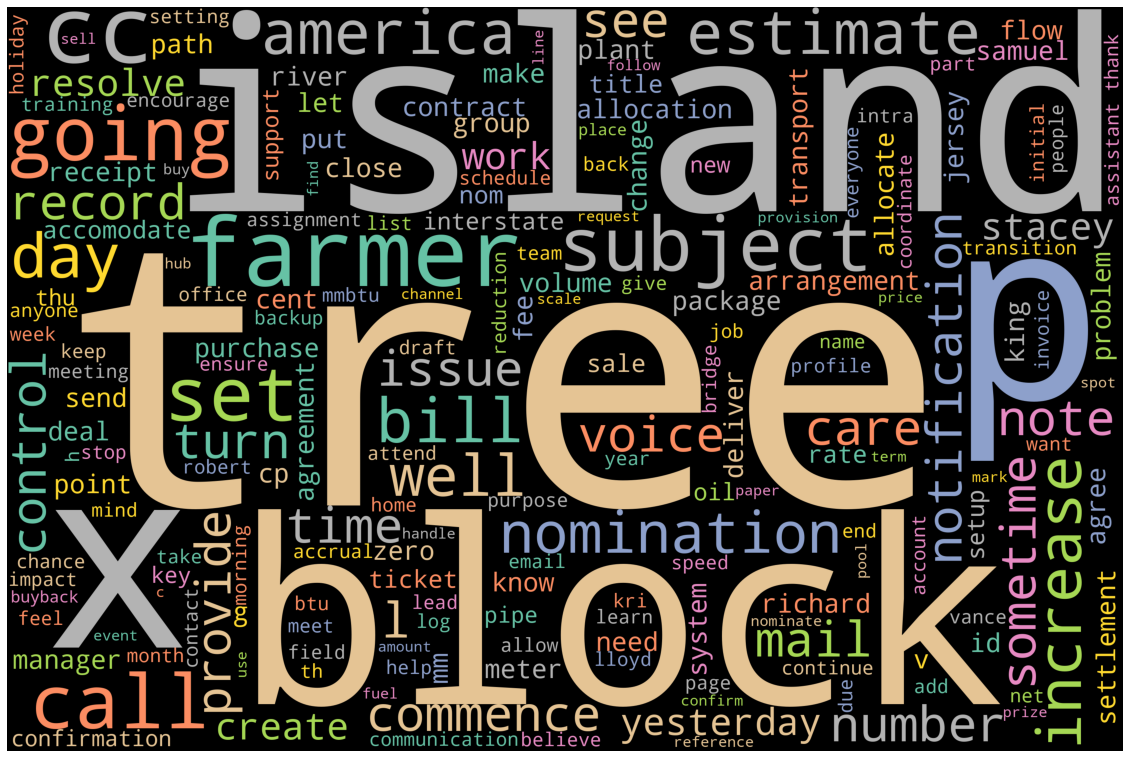

In [13]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")

# this is the word clout for 'ham' words 

(-0.5, 2999.5, 1999.5, -0.5)

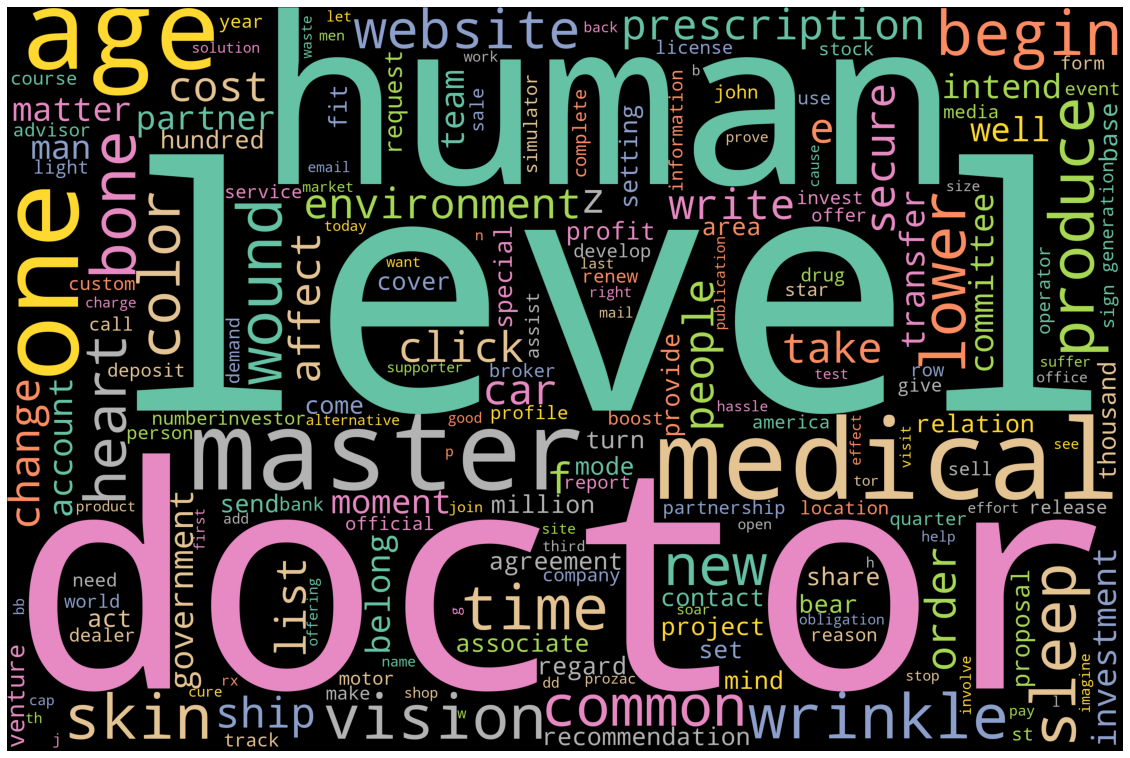

In [14]:
words = spam_words.keys()
string = ""      # make a string of all the dicitonary keys to make a word cloud..
for word  in words:
    string += word
    string += " "
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")

# word cloud for spam words. It contains mode words related to medical terms. 

In [19]:
ham_counts = list(ham_words.values())
spam_counts = list(spam_words.values())
ham_count = 0   # the total number of words observed in the ham emails
spam_count = 0   # Totla number of words in the spam emails
for count in ham_counts:
    ham_count += count

for count in spam_counts:
    spam_count += count

print(f"Total number of words in ham emails: {ham_count}")
print(f"Total number of words in spam emails: {spam_count}")

Total number of words in ham emails: 564521
Total number of words in spam emails: 261499


In [24]:
ham_probabilities = {word : ham_words[word] / ham_count for word in list(ham_words.keys())}
spam_probabilities = {word: spam_words[word] / spam_count for word in list(spam_words.keys())}

In [30]:
total_messages = total_ham_messages + total_spam_messages
print(f"Total messages: {total_messages}")
print(f"Prior probability of ham: {total_ham_messages / total_messages}")
print(f"Prior probability of spam: {total_spam_messages / total_messages}")

Total messages: 5172
Prior probability of ham: 0.7099767981438515
Prior probability of spam: 0.2900232018561485
